In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(1235)

In [3]:
data = [6.,5.,6.5,5.0,4,5,5,5,7.0,5.5,4.5,6.0,5.0,6.0,6.0,5.0,4.5]
data1 = [7.,8.,8.5,7.4,8.9,6.7,9.0,8.4,7.8,5.3,8.1]

In [4]:
print(np.mean(data), np.mean(data1), len(data+data1))

5.352941176470588 7.736363636363635 28


In [5]:
def Boot(sample):
    resample = random.choices(sample, k=len(sample))
    mean = np.mean(resample)
    return mean

In [6]:
meanlist = []
meanlist2 = []

Ntrials = 1000

for i in range(Ntrials):
    x = Boot(data)
    y = Boot(data1)
    meanlist.append(x)
    meanlist2.append(y)

(array([  1.,   7.,  22.,  65., 162., 231., 261., 177.,  61.,  13.]),
 array([6.52727273, 6.73181818, 6.93636364, 7.14090909, 7.34545455,
        7.55      , 7.75454545, 7.95909091, 8.16363636, 8.36818182,
        8.57272727]),
 <a list of 10 Patch objects>)

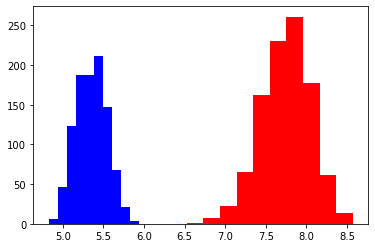

In [7]:
plt.hist(meanlist,color='b')
plt.hist(meanlist2,color='r')

In [8]:
def GetInterval(List, NTrials, CL = 0.95):
    
    List.sort()
    
    #For two-side band confidence level we have
    
    ii = int( NTrials * (( 1. - CL )/2.) )
       
    print('The Lower limit at 95% of confidence level:', List[ii])
    print('The Upper limit at 95% of confidence level:', List[-ii])
    print('Central Values is:', np.percentile(List,50))
    
    lower = List[ii]
    upper = List[-ii]
    
    return lower,upper

In [9]:
GetInterval(meanlist, Ntrials)
GetInterval(meanlist2, Ntrials)

The Lower limit at 95% of confidence level: 4.970588235294118
The Upper limit at 95% of confidence level: 5.735294117647059
Central Values is: 5.352941176470588
The Lower limit at 95% of confidence level: 7.118181818181819
The Upper limit at 95% of confidence level: 8.336363636363636
Central Values is: 7.763636363636365


(7.118181818181819, 8.336363636363636)

In [10]:
data = [3,7,25,10,15,6,12,25,15,7]
data1 = [48,44,40,38,33,21,20,12,1,18]

# Ahora vamos a hacerlo para las diferencias

In [11]:
NSamples = int(1e6)

diff1 = np.zeros(NSamples)
diff2 = np.zeros(NSamples)

# Longitud de cada array
n1 = len(data)
n2 = len(data1)


# Sumamos ambos set de datos
#Total = np.array( data + data1 )
Total = np.hstack((data,data1))

obsdiff = np.mean(data)-np.mean(data1)


print(n1,n2,len(Total),obsdiff)

10 10 20 -15.0


In [ ]:
for i in range(NSamples):
    
    Re1 = np.random.choice(data, size=n1,replace=True)
    Re2 = np.random.choice(data1, size=n2,replace=True)
    
    mean1 = np.mean(Re1)
    mean2 = np.mean(Re2)
    
    diff1[i] = mean1 - mean2
    
    ReTotal = np.random.choice(Total, size=n1+n2,replace=True)
    
    TestA = ReTotal[:n1]
    TestB = ReTotal[n1:]
        
    diff2[i] =  np.mean(TestA) - np.mean(TestB)      

In [ ]:
l1,u1 = GetInterval(diff1, NSamples)
l2,u2 = GetInterval(diff2, NSamples)

In [ ]:
plt.hist(diff1,color='b', bins=50,alpha = 0.5)
plt.axvline(x=obsdiff,color='r',label='diferencia observada')
plt.axvline(x=l1,color='k',linestyle='--',label='CL 95%')
plt.axvline(x=u1,color='k',linestyle='--')
plt.legend()

In [ ]:
plt.hist(diff2,color='b', bins=50,alpha = 0.5)
plt.axvline(x=np.mean(diff1),color='r',label='diferencia observada')
plt.axvline(x=-np.mean(diff1),color='r')
plt.legend()

In [ ]:
pvalue = ( sum(np.abs(diff2) > np.abs(np.mean(diff1)) ) )/len(diff2)
print(pvalue)